In [1]:
import pandas as pd
data = pd.read_csv('U.S._Renewable_Energy_Consumption.csv')
print(data.head())

   Year  Month          Sector  Hydroelectric Power  Geothermal Energy  \
0  1973      1      Commerical                 0.00               0.00   
1  1973      1  Electric Power                 0.00               0.49   
2  1973      1      Industrial                 1.04               0.00   
3  1973      1     Residential                 0.00               0.00   
4  1973      1  Transportation                 0.00               0.00   

   Solar Energy  Wind Energy  Wood Energy  Waste Energy  \
0           0.0          0.0        0.570         0.000   
1           0.0          0.0        0.054         0.157   
2           0.0          0.0       98.933         0.000   
3           0.0          0.0       30.074         0.000   
4           0.0          0.0        0.000         0.000   

   Fuel Ethanol, Excluding Denaturant  Biomass Losses and Co-products  \
0                                 0.0                             0.0   
1                                 0.0                 

**Filter Data for a Specific Year Range**

Data from 2010 are more useful than data in previous years, especially for Renewable Energy

In [2]:
#Data Filtering
filtered_data = data[data['Year']>=2010]

**Analyzing Total Renewable Energy Trends**

Plotting Total Energy Trends for the Filtered Range:

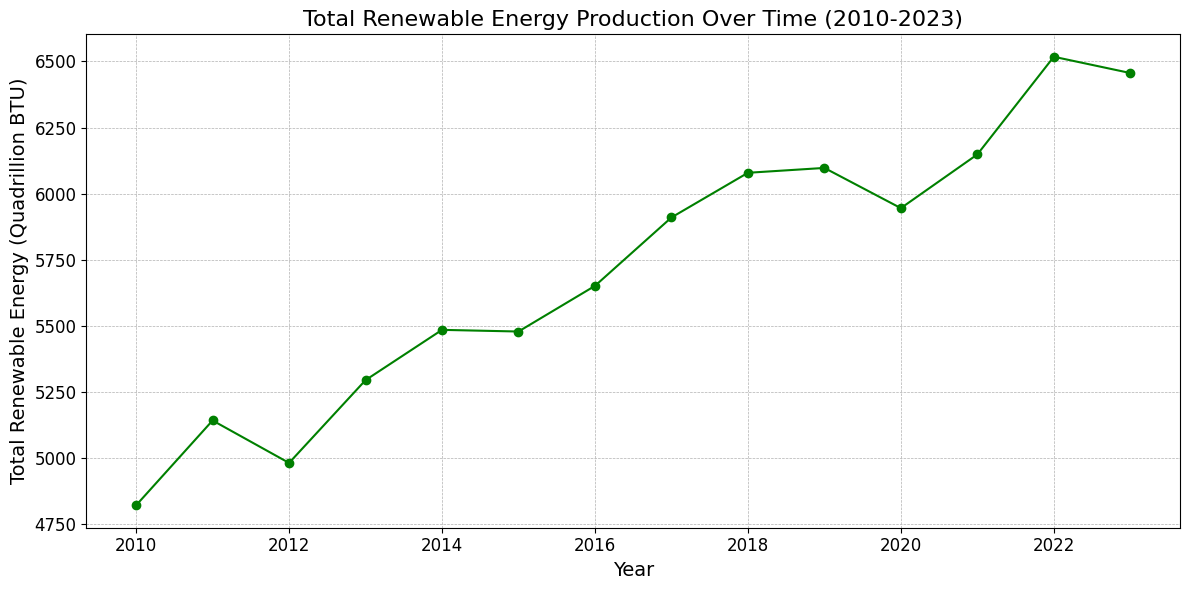

In [3]:
import matplotlib.pyplot as plt

# Group data by 'Year' and sum up 'Total Renewable Energy'
yearly_trends = filtered_data.groupby('Year')['Total Renewable Energy'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='green')
plt.title('Total Renewable Energy Production Over Time (2010-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Renewable Energy (Quadrillion BTU)', fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
energy_2010 = yearly_trends.loc[2010]
energy_2023 = yearly_trends.loc[2023]

absolute_increase = energy_2023 - energy_2010

percentage_increase = (absolute_increase / energy_2010) * 100

print(f'Renewable Energy Production in 2010: {energy_2010:.2f} Quadrillion BTU')
print(f'Renewable Energy Production in 2023: {energy_2023:.2f} Quadrillion BTU')
print(f'Absolute Increase (2010-2023): {absolute_increase:.2f} Quadrillion BTU')
print(f'Percentage Increase (2010-2023): {percentage_increase:.2f} Quadrillion BTU')

Renewable Energy Production in 2010: 4821.14 Quadrillion BTU
Renewable Energy Production in 2023: 6456.17 Quadrillion BTU
Absolute Increase (2010-2023): 1635.02 Quadrillion BTU
Percentage Increase (2010-2023): 33.91 Quadrillion BTU


Renewable Energy Sources has been gradually increasing through years.

In 2010, Renewable Energy production was 4821.14 Quadrillion BTU (British Thermal Units).

In 2023, Renewable Energy production increased to 6456.17 Quadrillion BTU, a 1635.02 Quadrillion Increase or 33.91% increase from 2010.

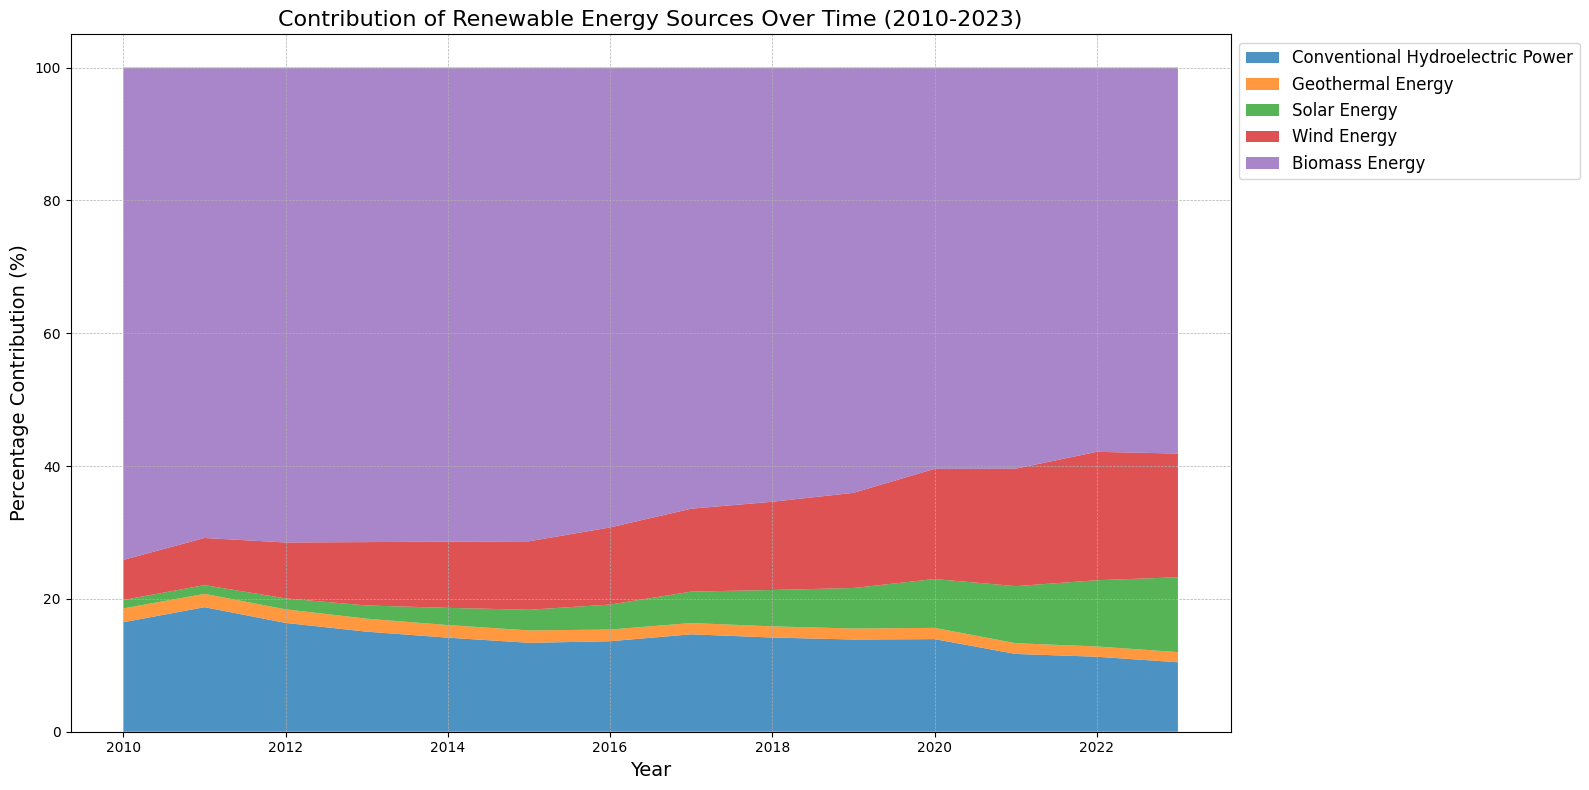

In [5]:
energy_sources = [
    'Conventional Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy'
]
source_trends = data.groupby('Year')[energy_sources].sum()

# Calculate Total Energy for each year
total_energy = filtered_data.groupby('Year')[energy_sources].sum().sum(axis=1)

# Calculate Contribution (%)
contribution = filtered_data.groupby('Year')[energy_sources].sum().div(total_energy, axis=0) * 100

# Plot as Stacked Area Chart
plt.figure(figsize=(16, 8))
plt.stackplot(contribution.index, contribution.values.T, labels=energy_sources, alpha=0.8)
plt.title('Contribution of Renewable Energy Sources Over Time (2010-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Contribution (%)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Total share of Renewable Energy Production in Area Chart.
Biomass Energy is the largest Renewable Energy Production source, with over 55% of total Renewable Energy Generation.
Wind and Solar Energy Generation is increasing year to year.

Trends of Renewable Energy Sources (2010 to 2023):

Conventional Hydroelectric Power:
  2010: 881.85 Quadrillion BTU
  2023: 814.49 Quadrillion BTU
  Absolute Increase: -67.36 Quadrillion BTU
  Percentage Increase: -7.64%
----------------------------------------
Geothermal Energy:
  2010: 111.43 Quadrillion BTU
  2023: 119.67 Quadrillion BTU
  Absolute Increase: 8.24 Quadrillion BTU
  Percentage Increase: 7.39%
----------------------------------------
Solar Energy:
  2010: 67.85 Quadrillion BTU
  2023: 877.54 Quadrillion BTU
  Absolute Increase: 809.69 Quadrillion BTU
  Percentage Increase: 1193.31%
----------------------------------------
Wind Energy:
  2010: 322.95 Quadrillion BTU
  2023: 1450.90 Quadrillion BTU
  Absolute Increase: 1127.95 Quadrillion BTU
  Percentage Increase: 349.26%
----------------------------------------
Biomass Energy:
  2010: 3965.11 Quadrillion BTU
  2023: 4527.75 Quadrillion BTU
  Absolute Increase: 562.64 Quadrillion BTU
  Percentage Increase: 14.19%
-----

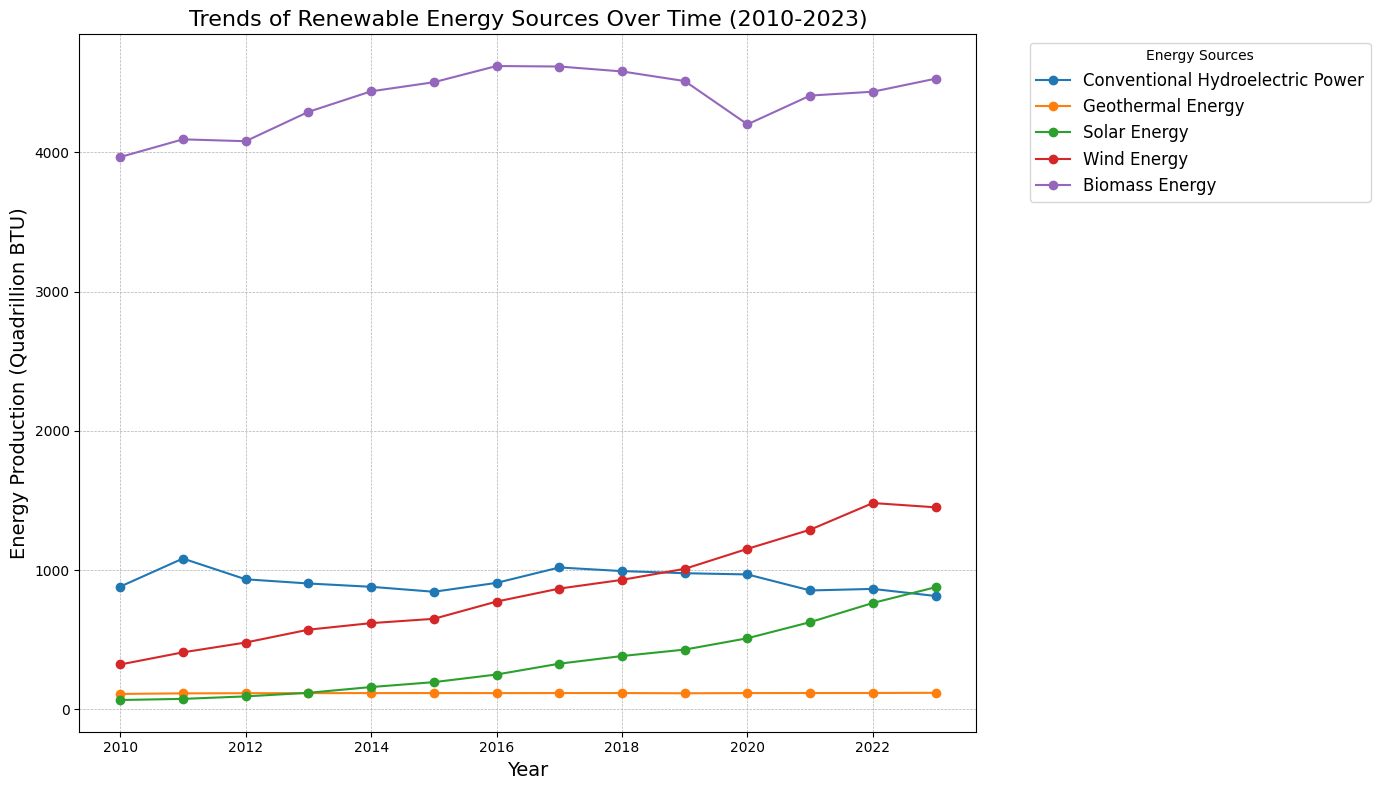

In [6]:
# List of renewable energy sources
renewable_sources = [
    'Conventional Hydroelectric Power', 
    'Geothermal Energy', 
    'Solar Energy', 
    'Wind Energy', 
    'Biomass Energy'
]

# Group data by 'Year' and sum energy for each source
source_trends = filtered_data.groupby('Year')[renewable_sources].sum()

# Initialize a dictionary to store results
trend_analysis = {}

print("Trends of Renewable Energy Sources (2010 to 2023):\n")

for source in renewable_sources:
    # Extract values for 2010 and 2023
    value_2010 = source_trends.loc[2010, source]
    value_2023 = source_trends.loc[2023, source]
    
    # Calculate absolute and percentage increase
    absolute_increase = value_2023 - value_2010
    percentage_increase = (absolute_increase / value_2010) * 100 if value_2010 != 0 else None

    # Save the results to the dictionary
    trend_analysis[source] = {
        '2010': value_2010,
        '2023': value_2023,
        'Absolute Increase': absolute_increase,
        'Percentage Increase': percentage_increase
    }

    # Print the results
    print(f"{source}:")
    print(f"  2010: {value_2010:.2f} Quadrillion BTU")
    print(f"  2023: {value_2023:.2f} Quadrillion BTU")
    print(f"  Absolute Increase: {absolute_increase:.2f} Quadrillion BTU")
    if percentage_increase is not None:
        print(f"  Percentage Increase: {percentage_increase:.2f}%")
    else:
        print(f"  Percentage Increase: Data unavailable (2010 value is zero).")
    print("-" * 40)

# Visualization of Trends for All Sources
plt.figure(figsize=(14, 8))

for source in renewable_sources:
    plt.plot(source_trends.index, source_trends[source], marker='o', linestyle='-', label=source)

plt.title('Trends of Renewable Energy Sources Over Time (2010-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy Production (Quadrillion BTU)', fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Energy Sources", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Users/bajram/Desktop/U.S. Renewable Energy consumption/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/bajram/Desktop/U.S. Renewable Energy consumption/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/bajram/Desktop/U.S. Renewable Energy consumption/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/

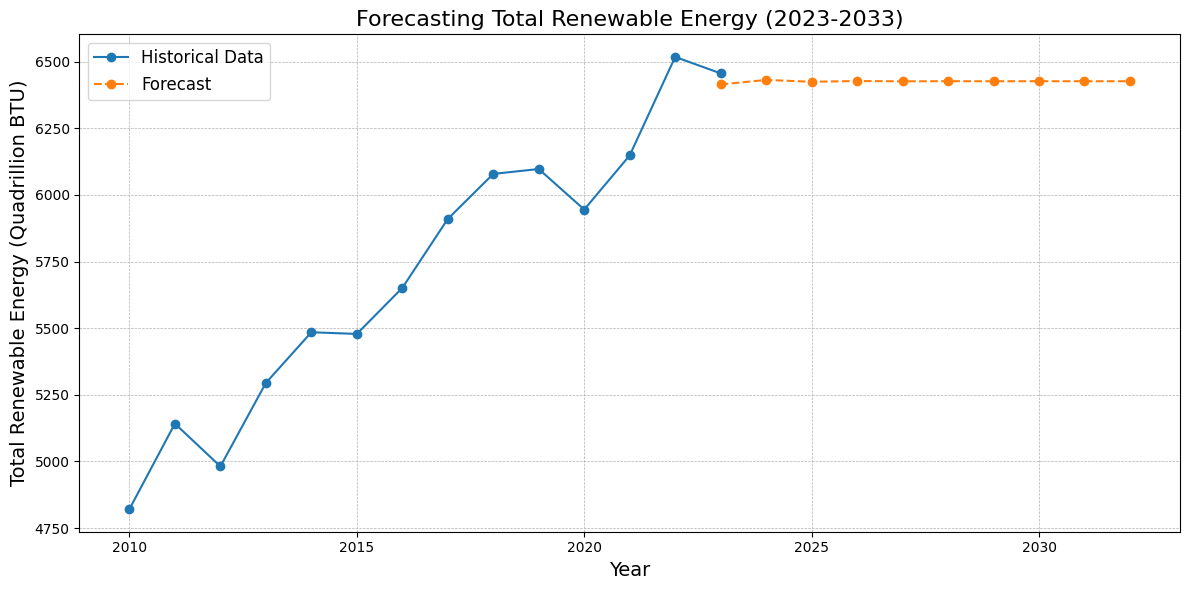

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Forecasting Total Renewable Energy
yearly_totals = filtered_data.groupby('Year')['Total Renewable Energy'].sum()

# ARIMA Model (use the most recent years for better prediction)
model = ARIMA(yearly_totals, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast for 10 Years Ahead
forecast_years = np.arange(2023, 2033)
forecast_values = fitted_model.forecast(steps=10)

# Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', label='Historical Data')
plt.plot(forecast_years, forecast_values, marker='o', linestyle='--', label='Forecast')
plt.title('Forecasting Total Renewable Energy (2023-2033)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Renewable Energy (Quadrillion BTU)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Based on Forecasting, we would see a slightly increase in Renewable Energy Production

In [8]:
def plot_energy_trends(data, start_year):
    filtered_data = data[data['Year'] >= start_year]
    trends = filtered_data.groupby('Year')['Total Renewable Energy'].sum()
    plt.plot(trends.index, trends.values, marker='o')
    plt.show()

In [9]:
data = data[data['Year'] >= 2010]
filtered_data.to_csv('filtered_energy_data_2010_onwards.csv', index=False)

We saved data only from 2010 onwards as we will use Google Looker for Graphs, and data from 1973 are not neccessary.